In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

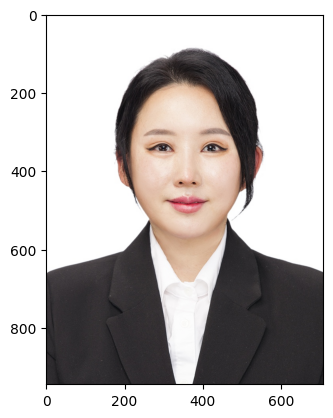

In [12]:
image_path = '/content/gdrive/MyDrive/Colab Notebooks/공모전/DS CONTEST/camera_sticker/images/증명사진.jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) #RGB이미지로 바꾸기
plt.imshow(image)#이미지 실제 출력하기

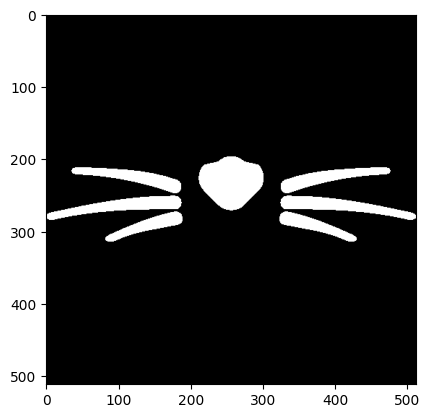

In [14]:
cat_whiskers_path = '/content/gdrive/MyDrive/Colab Notebooks/공모전/DS CONTEST/camera_sticker/images/cat-whiskers.png'
whiskers = cv2.cvtColor(cv2.imread(cat_whiskers_path), cv2.COLOR_BGR2RGB)
whiskers = cv2.bitwise_not(whiskers)
plt.imshow(whiskers)

In [15]:
#detector 선언하
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(image, 1)

print(dlib_rects)

rectangles[[(205, 241) (526, 562)]]


In [16]:
image_show = image.copy()

In [17]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(image_show, (l, t), (r, b), (0, 255, 0), 4, lineType=cv2.LINE_AA)

In [18]:
#저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = '/content/gdrive/MyDrive/Colab Notebooks/공모전/DS CONTEST/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [19]:
list_landmarks = []  # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(image_show, dlib_rect)  # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points) # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [20]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(image_show, point, 2, (0, 255, 255), -1)


In [21]:
whiskers_sticker = whiskers

In [22]:
# Extract the alpha channel
whiskers_mask = np.any(whiskers_sticker[:, :, :3] != [255, 255, 255], axis=-1)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    nose_middle = landmark[34]
    lib_middle = landmark[52]
    w = h = dlib_rect.width()

    x = nose_middle[0]
    y = int((lib_middle[1] + nose_middle[1]) / 2)

    refined_x = x - w // 2
    refined_y = y - h // 2

    if refined_x < 0:
        whiskers_sticker = whiskers_sticker[:, -refined_x:]
        refined_x = 0

    if refined_y < 0:
        whiskers_sticker = whiskers_sticker[-refined_y:, :]
        refined_y = 0

    whiskers_sticker = cv2.resize(whiskers, (w, h))

    sticker_area = image_show[refined_y:refined_y + whiskers_sticker.shape[0], refined_x:refined_x + whiskers_sticker.shape[1]]

    image_show[refined_y:refined_y + whiskers_sticker.shape[0], refined_x:refined_x + whiskers_sticker.shape[1]] = \
        np.where(whiskers_sticker == 0, sticker_area, whiskers_sticker).astype(np.uint8)

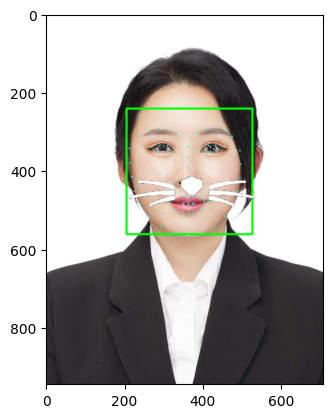

In [23]:
plt.imshow(image_show)
plt.show()

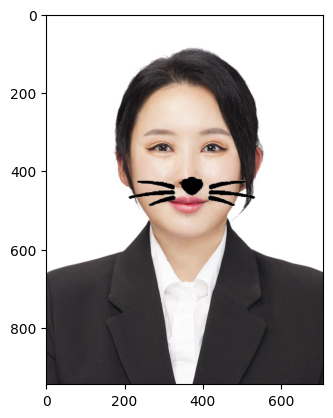

In [25]:
sticker_area = image[refined_y:refined_y +whiskers_sticker.shape[0], refined_x:refined_x+whiskers_sticker.shape[1]]

image[refined_y:refined_y +whiskers_sticker.shape[0], refined_x:refined_x+whiskers_sticker.shape[1]] = \
    np.where(whiskers_sticker==0,sticker_area,whiskers_sticker-255).astype(np.uint8) #반전처리한 PNG파일에 명암을 줌 -255
plt.imshow(image)
plt.show()